# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset: Please find "DataAnalyst_v3" in the repository

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [71]:
# Import pacakges
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [72]:
# I made more calculated columns during the last assignment in Tableau. 
# This is the updated version, which is exported from Tableau. 
df = pd.read_csv("DataAnalyst_v3.csv")

In [73]:
df.head()

,City,Est. Salary Range,Industry,Industry T/F,Location,Max(txt),Min(txt),State,State(DNU),Avg. Salary,Count City in Max Salary,Count City in Min Salary,Index,Max,Min
0,New York,$37K-$66K,Social Assistance,t,"New York, NY",$66K,$37K,NY,NY,"$51,500.00",0,0,0,"$66,000.00","$37,000.00"
1,New York,$37K-$66K,Health Care Services & Hospitals,t,"New York, NY",$66K,$37K,NY,NY,"$51,500.00",0,0,1,"$66,000.00","$37,000.00"
2,New York,$37K-$66K,Internet,t,"New York, NY",$66K,$37K,NY,NY,"$51,500.00",0,0,2,"$66,000.00","$37,000.00"
3,New York,$37K-$66K,IT Services,t,"New York, NY",$66K,$37K,NY,NY,"$51,500.00",0,0,3,"$66,000.00","$37,000.00"
4,New York,$37K-$66K,Sports & Recreation,t,"New York, NY",$66K,$37K,NY,NY,"$51,500.00",0,0,4,"$66,000.00","$37,000.00"


In [74]:
# I skimmed through below and decided in advance what I'd like to see
# I'd like to see correlation between the average salary and count of jobs listed per that average salary.
# "What level of salary do employers seek the most when hiring Data Analysts?"

# I'm going to use one column, Average Salary, and I can get its count. 

# Let's trim the column so that I cant treat it as numbers.

df['Avg. Salary']=(df['Avg. Salary'].replace( '[\$,)]','', regex=True ).replace( '[(]','-',   regex=True ).astype(float))

In [75]:
df.head(3)

,City,Est. Salary Range,Industry,Industry T/F,Location,Max(txt),Min(txt),State,State(DNU),Avg. Salary,Count City in Max Salary,Count City in Min Salary,Index,Max,Min
0,New York,$37K-$66K,Social Assistance,t,"New York, NY",$66K,$37K,NY,NY,51500.0,0,0,0,"$66,000.00","$37,000.00"
1,New York,$37K-$66K,Health Care Services & Hospitals,t,"New York, NY",$66K,$37K,NY,NY,51500.0,0,0,1,"$66,000.00","$37,000.00"
2,New York,$37K-$66K,Internet,t,"New York, NY",$66K,$37K,NY,NY,51500.0,0,0,2,"$66,000.00","$37,000.00"


In [89]:
# Count of Avg.Salary shows how many jobs listed in that salary.

df_v2 = df['Avg. Salary'].value_counts().to_frame('Count of Jobs Listed')
df_v2


,Count of Jobs Listed
59500.0,88
72000.0,81
68000.0,68
63000.0,58
59000.0,57
...,...
42000.0,8
44000.0,4
45000.0,4
60000.0,3


In [96]:
# Salary became index, need to name it.

df_v2.index.name = 'Average Salary'

In [97]:
# New dataframe I'm going to use for next steps.

df_v3 = df_v2.reset_index()
df_v3

,Average Salary,Count of Jobs Listed
0,59500.0,88
1,72000.0,81
2,68000.0,68
3,63000.0,58
4,59000.0,57
...,...,...
68,42000.0,8
69,44000.0,4
70,45000.0,4
71,60000.0,3


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

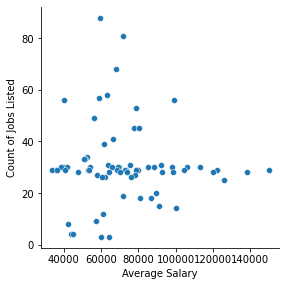

In [98]:
#pairplot
sns.pairplot(df_v3, x_vars='Average Salary',
                y_vars='Count of Jobs Listed', size=4, aspect=1, kind='scatter')
plt.show()

In [99]:
#correlation
df_v3.corr()

,Average Salary,Count of Jobs Listed
Average Salary,1.000000,-0.014673
Count of Jobs Listed,-0.014673,1.000000


<AxesSubplot:>

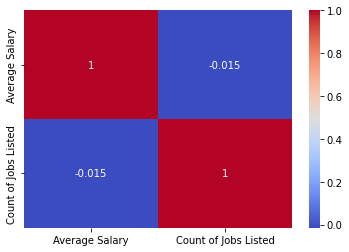

In [100]:
#heatmap
sns.heatmap(df_v3.corr(), cmap='coolwarm', annot=True)

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [103]:
# Creating X and y
# X = Average Salary (IV)
# y = Count of Jobs Listed (DV)

X = df_v3['Average Salary']
y = df_v3['Count of Jobs Listed']

In [104]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [106]:
# Take a look at the train dataset
X_train

21     69500.0
45     73000.0
0      59500.0
18     63500.0
12     61500.0
6      40000.0
47    138500.0
38     79500.0
60     89500.0
37     73500.0
35     68500.0
58     76000.0
46     64500.0
30     88500.0
66     61000.0
57     60500.0
41     80000.0
65    100000.0
62     87000.0
7      78500.0
3      63000.0
70     45000.0
50     92500.0
59    126000.0
19     54000.0
13     52500.0
1      72000.0
31     36000.0
4      59000.0
44     36500.0
27    106000.0
2      68000.0
22     39500.0
29     66000.0
9      77500.0
16     92000.0
43     79000.0
36     33500.0
15     51000.0
71     60000.0
69     44000.0
49     74000.0
34     40500.0
14     51500.0
53     70000.0
52     98500.0
10     80500.0
48    120000.0
67     57000.0
24    113000.0
8      56000.0
Name: Average Salary, dtype: float64

In [107]:
y_train

21    30
45    29
0     88
18    31
12    39
6     56
47    28
38    29
60    20
37    29
35    29
58    26
46    28
30    30
66    12
57    26
41    29
65    14
62    18
7     53
3     58
70     4
50    28
59    25
19    30
13    34
1     81
31    29
4     57
44    29
27    30
2     68
22    30
29    30
9     45
16    31
43    29
36    29
15    33
71     3
69     4
49    28
34    29
14    33
53    28
52    28
10    45
48    28
67     9
24    30
8     49
Name: Count of Jobs Listed, dtype: int64

In [108]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [109]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const             36.086128
Average Salary    -0.000050
dtype: float64

In [110]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Count of Jobs Listed   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                 -0.015
Method:                   Least Squares   F-statistic:                    0.2432
Date:                  Sun, 27 Mar 2022   Prob (F-statistic):              0.624
Time:                          22:38:22   Log-Likelihood:                -215.74
No. Observations:                    51   AIC:                             435.5
Df Residuals:                        49   BIC:                             439.3
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             36.0861      7.631      4.729      0.000      20.750      51.422
Average Salary -5.029e-05      0.000     -0.493      0.624      -0.000       0.000
==============================================================================
Omnibus:                       16.562   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.890
Skew:                           1.136   Prob(JB):                     1.76e-05
Kurtosis:                       5.268   Cond. No.                     2.40e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.4e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

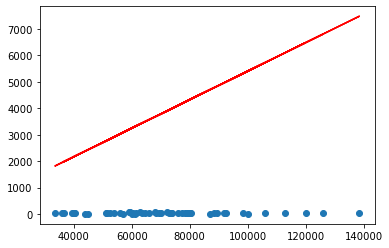

In [111]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [112]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

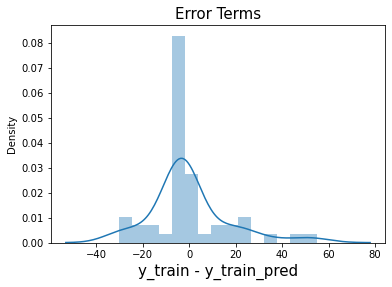

In [113]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

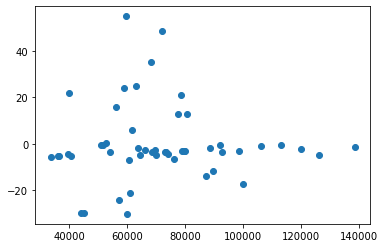

In [114]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.005
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? No
3. Was your plot of the error terms a bell curve? No